<a href="https://colab.research.google.com/github/Lenna888/Classifier_ML_Dsmatallana_Lelatorre_802/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clasificador de correo SPAM - HAM**
---
Este script tiene como objetivo construir un modelo de Regresión Logística para la clasificación de correos SPAM y HAM. Se realiza un análisis de las características (features) para el entrenamiento del modelo. Además se usará F1 Score y matrices de confusión como evaluador del modelo.


@authors: Duvan Santiago Matallana Jiménez - Laura Estefania Latorre Pachon Grupo: 802  
@date: 2025-09-10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Hola

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler

print("Successful imports")

Successful imports


Lectura y normalización de los datos

In [13]:
try:
  #Load the dataset
  df = pd.read_csv('/content/drive/MyDrive/Machine_learning/Dataset_linear_model/dataset_con_clase.csv', sep=';')
  print("Dataset has been upload correctly, watch to aprove:")
  print(df.head())
except FileNotFoundError:
  print("Error: file not exist or wrong directory")
  df = None

if df is not None:
    # Normalize sender_domain vs reply_domain
    # Create a new column ‘domain_matches’
    # It will be 1 if the domains are the same, 0 if they are different.
    df['dominio_coincide'] = (df['dominio_remitente'] == df['dominio_respuesta']).astype(int)
    print("\nThe column ‘dominio_coincide’ has been created.")
    df = df.drop(columns=['dominio_remitente', 'dominio_respuesta'])
    print("\nThe columns ‘dominio_remitente’ and ‘dominio_respuesta’ have been removed.")

    X = df.drop('clase', axis=1)
    y = df['clase']
    print("\nThe variables X and y have been created.")
    print(X.columns.tolist())




Dataset has been upload correctly, watch to aprove:
   cantidad_exclamaciones  cantidad_interrogaciones  cantidad_urls  \
0                       5                         0              7   
1                       3                         1              3   
2                       4                         0              4   
3                       2                         1              2   
4                       0                         1              1   

   javascript_embebido dominio_remitente dominio_respuesta  \
0                    0    cheapoffers.ru       company.com   
1                    0      scammail.xyz       company.com   
2                    0        winfree.cn       company.com   
3                    1       company.com      scammail.xyz   
4                    1       company.com       company.com   

   cantidad_dominios_urls  ip_en_url  adjuntos_ejecutables  \
0                       2          0                     0   
1                       3     

Para ver las mejores correlaciones

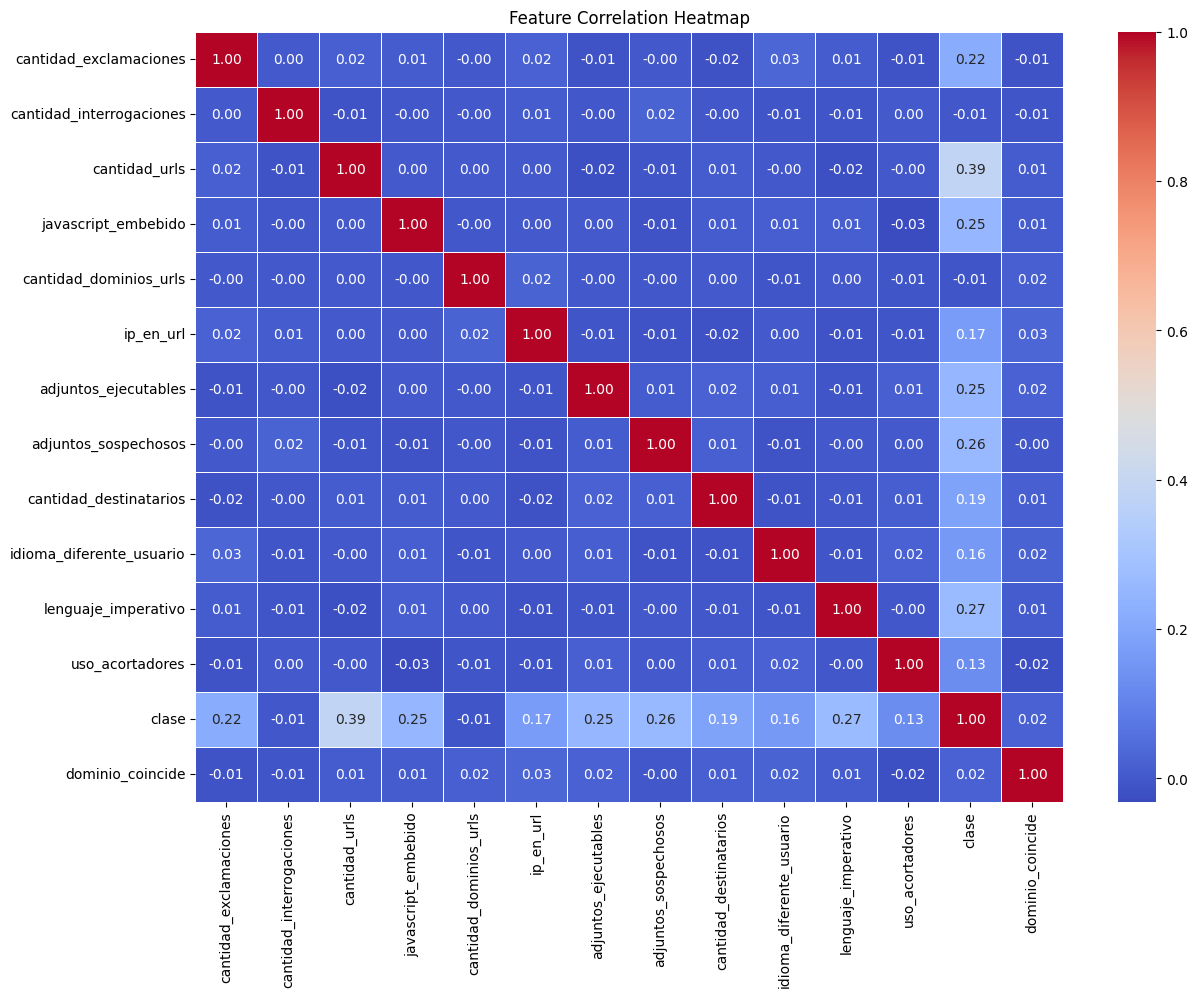

In [14]:
if df is not None:
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Set the figure size for better visualization
    plt.figure(figsize=(14, 10))

    # Create the heatmap with seaborn
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Feature Correlation Heatmap')

    # Display the graph
    plt.show()

División del conjunto de datos

In [15]:
if 'X' in locals() and 'y' in locals():
  x_train, x_temp, y_train, y_temp = train_test_split(
      X, y, test_size = 0.3, random_state=42,
      stratify=y
  )

  x_val, x_test, y_val, y_test = train_test_split(
      x_temp, y_temp, test_size=0.5, random_state=42,
      stratify=y_temp
  )

  print(f"Training set size: {x_train.shape[0]} samples")
  print(f"Validation set size: {x_val.shape[0]} samples")
  print(f"Test set size: {x_test.shape[0]} samples")
else:
  print("Error: Variables X and y are not defined.")

Training set size: 3500 samples
Validation set size: 750 samples
Test set size: 750 samples


Entrenamiento

Prueba con todas las features
Accuracy: 0.98533
F1 Score: 0.98841


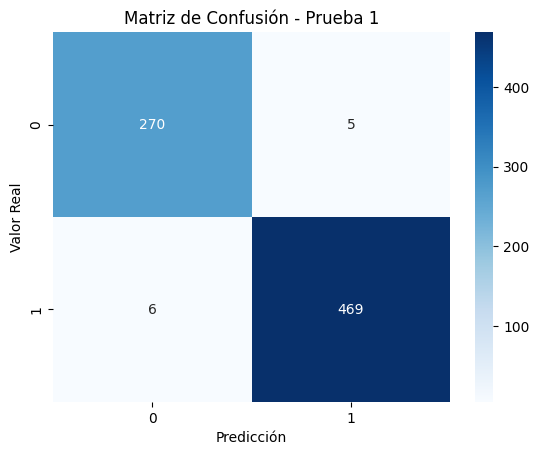

In [16]:
if 'x_train' in locals():
  print("Prueba con todas las features")
  logistic_model_1 = LogisticRegression(tol=0.0001, random_state=42, max_iter=10000)
  logistic_model_1.fit(x_train, y_train)
  y_pred_val_1 = logistic_model_1.predict(x_val)
  accuracy_1 = accuracy_score(y_val, y_pred_val_1)
  f1_1 = f1_score(y_val, y_pred_val_1)
  print(f"Accuracy: {accuracy_1:.5f}")
  print(f"F1 Score: {f1_1:.5f}")

  cm_1 = confusion_matrix(y_val, y_pred_val_1)
  sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues')
  plt.title('Matriz de Confusión - Prueba 1')
  plt.xlabel('Predicción')
  plt.ylabel('Valor Real')
  plt.show()

else:
  print("Error: Variable x_train is not defined.")


_Prueba con Features de alta relación_

Test with some features
Accuracy: 0.89733
F1 Score: 0.91817


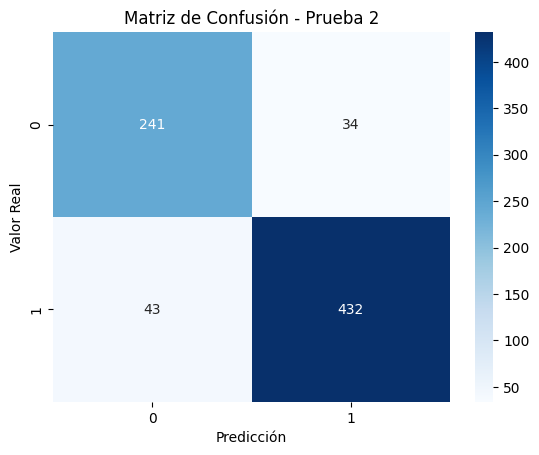

In [17]:
if 'x_train' in locals():
  selected_features =[
      'cantidad_exclamaciones',
      'cantidad_urls',
      'javascript_embebido',
      'adjuntos_ejecutables',
      'adjuntos_sospechosos',
      'lenguaje_imperativo'
  ]

  print("Test with some features")
  x_train_2 = x_train[selected_features]
  x_val_2 = x_val[selected_features]

  logistic_model_2 = LogisticRegression(tol=0.0001, random_state=42, max_iter=10000)
  logistic_model_2.fit(x_train_2, y_train)

  y_pred_val_2 = logistic_model_2.predict(x_val_2)
  accuracy_2 = accuracy_score(y_val, y_pred_val_2)
  f1_2 = f1_score(y_val, y_pred_val_2)

  print(f"Accuracy: {accuracy_2:.5f}")
  print(f"F1 Score: {f1_2:.5f}")

  cm_2 = confusion_matrix(y_val, y_pred_val_2)
  sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues')
  plt.title('Matriz de Confusión - Prueba 2')
  plt.xlabel('Predicción')
  plt.ylabel('Valor Real')
  plt.show()





_Prueba con eliminación de ruido en Features_

Accuracy: 0.98667
F1 Score: 0.98945


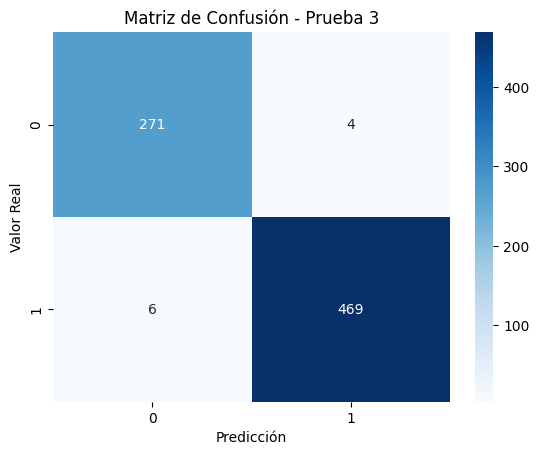

In [18]:
if 'x_train' in locals():
  excepted_features = [
      'cantidad_interrogaciones',
      'cantidad_dominios_urls',
      'dominio_coincide'
  ]
  without_excepted_features = [col for col in X.columns if col not in excepted_features]
  logistic_model_3 = LogisticRegression(tol=0.0001, random_state=42, max_iter=10000)
  logistic_model_3.fit(x_train[without_excepted_features], y_train)
  y_pred_val_3 = logistic_model_3.predict(x_val[without_excepted_features])
  accuracy_3 = accuracy_score(y_val, y_pred_val_3)
  f1_3 = f1_score(y_val, y_pred_val_3)
  print(f"Accuracy: {accuracy_3:.5f}")
  print(f"F1 Score: {f1_3:.5f}")

  cm_3 = confusion_matrix(y_val, y_pred_val_3)
  sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues')
  plt.title('Matriz de Confusión - Prueba 3')
  plt.xlabel('Predicción')
  plt.ylabel('Valor Real')
  plt.show()


_Solo Features de correlación superior a 0.15_

Accuracy: 0.95333
F1 Score: 0.96327


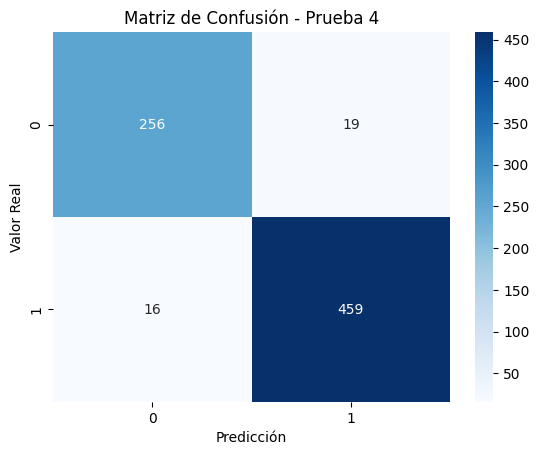

In [21]:
if 'x_train' in locals():
    features_over = [
        'cantidad_urls',
        'lenguaje_imperativo',
        'adjuntos_sospechosos',
        'javascript_embebido',
        'adjuntos_ejecutables',
        'cantidad_exclamaciones',
        'cantidad_destinatarios',
        'ip_en_url',
        'idioma_diferente_usuario'
    ]
    logistic_model_4 = LogisticRegression(tol=0.0001, random_state=42, max_iter=1000)
    logistic_model_4.fit(x_train[features_over], y_train)
    y_pred_val_4 = logistic_model_4.predict(x_val[features_over])
    accuracy_4 = accuracy_score(y_val, y_pred_val_4)
    f1_4 = f1_score(y_val, y_pred_val_4)
    print(f"Accuracy: {accuracy_4:.5f}")
    print(f"F1 Score: {f1_4:.5f}")

    cm_4 = confusion_matrix(y_val, y_pred_val_4)
    sns.heatmap(cm_4, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión - Prueba 4')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

Ahora se normalizan los datos para evitar aparición de outliers

In [ ]:
if 'x_train' in locals():
  scaler = StandardScaler()
  x_train_scaled_ss = scaler.fit_transform(x_train)
  x_val_scaled_ss = scaler.transform(x_val)
  x_test_scaled_ss = scaler.transform(x_test)
  x_train_scaled = pd.DataFrame(x_train_scaled_ss, columns=X.columns)
  x_val_scaled = pd.DataFrame(x_val_scaled_ss, columns=X.columns)
  x_test_scaled = pd.DataFrame(x_test_scaled_ss, columns=X.columns)

  print("Datos convertidos a DataFrame. Las variables están listas para las pruebas.")

**Pruebas con datos escalados**

In [27]:
# --- Prueba 1  ---
print(" Prueba 1 (Todas las features) con datos escalados")
logistic_model_1s = LogisticRegression(random_state=42, max_iter=1000)
logistic_model_1s.fit(x_train_scaled, y_train)
y_pred_val_1s = logistic_model_1s.predict(x_val_scaled)
print(f"Exactitud: {accuracy_score(y_val, y_pred_val_1s):.5f}")
print(f"Puntuación F1: {f1_score(y_val, y_pred_val_1s):.5f}")

# --- Prueba 2 ---
selected_features =[
      'cantidad_exclamaciones',
      'cantidad_urls',
      'javascript_embebido',
      'adjuntos_ejecutables',
      'adjuntos_sospechosos',
      'lenguaje_imperativo'
  ]
print(f"\n Prueba 2 (Alta relación) con datos escalados")
logistic_model_2s = LogisticRegression(random_state=42, max_iter=1000)
logistic_model_2s.fit(x_train_scaled[selected_features], y_train)
y_pred_val_2s = logistic_model_2s.predict(x_val_scaled[selected_features])
print(f"Exactitud: {accuracy_score(y_val, y_pred_val_2s):.5f}")
print(f"Puntuación F1: {f1_score(y_val, y_pred_val_2s):.5f}")

# --- Prueba 3 ---
excepted_features = [
      'cantidad_interrogaciones',
      'cantidad_dominios_urls',
      'dominio_coincide'
  ]
features_3 = [col for col in X.columns if col not in excepted_features]
print(f"\n Prueba 3 (Excluyendo ruido) con datos escalados")
logistic_model_3s = LogisticRegression(random_state=42, max_iter=1000)
logistic_model_3s.fit(x_train_scaled[features_3], y_train)
y_pred_val_3s = logistic_model_3s.predict(x_val_scaled[features_3])
print(f"Exactitud: {accuracy_score(y_val, y_pred_val_3s):.5f}")
print(f"Puntuación F1: {f1_score(y_val, y_pred_val_3s):.5f}")

# --- Prueba 4 ---
features_over = [
        'cantidad_urls',
        'lenguaje_imperativo',
        'adjuntos_sospechosos',
        'javascript_embebido',
        'adjuntos_ejecutables',
        'cantidad_exclamaciones',
        'cantidad_destinatarios',
        'ip_en_url',
        'idioma_diferente_usuario'
    ]
print(f"\nPrueba 4 (Equilibrado) con datos escalados ")
logistic_model_4s = LogisticRegression(random_state=42, max_iter=1000)
logistic_model_4s.fit(x_train_scaled[features_over], y_train)
y_pred_val_4s = logistic_model_4s.predict(x_val_scaled[features_over])
print(f"Exactitud: {accuracy_score(y_val, y_pred_val_4s):.5f}")
print(f"Puntuación F1: {f1_score(y_val, y_pred_val_4s):.5f}")

 Prueba 1 (Todas las features) con datos escalados
Exactitud: 1.00000
Puntuación F1: 1.00000

 Prueba 2 (Alta relación) con datos escalados
Exactitud: 0.89733
Puntuación F1: 0.91817

 Prueba 3 (Excluyendo ruido) con datos escalados
Exactitud: 0.99867
Puntuación F1: 0.99895

Prueba 4 (Equilibrado) con datos escalados 
Exactitud: 0.95600
Puntuación F1: 0.96545


_Uso de datos de testeo para el modelo de mejores resultados, sin normalización_

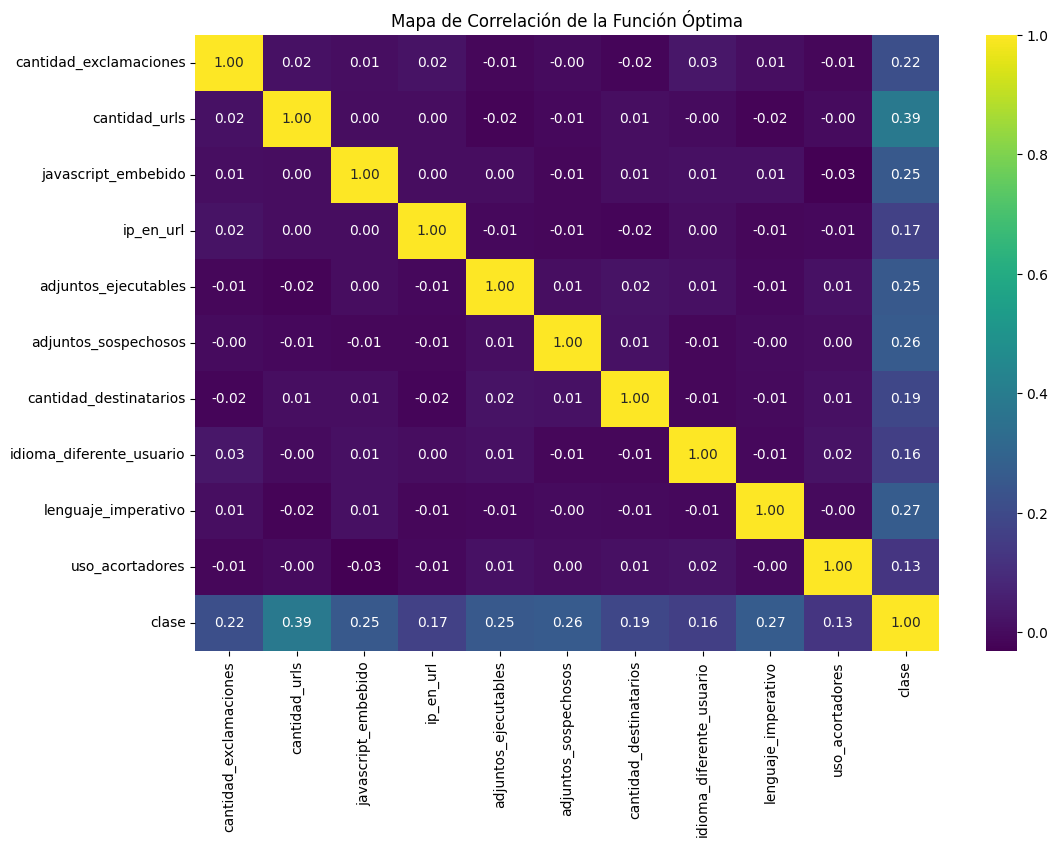

In [35]:

features_del_mejor_modelo = features_3
mejor_modelo = logistic_model_3

# Sumamos 'clase' para ver su correlación con las demás
features_para_mapa = features_del_mejor_modelo + ['clase']

correlation_matrix_optima = df[features_para_mapa].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_optima, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de Correlación de la Función Óptima')
plt.show()

_Uso de datos de testeo para el modelo de mejores resultados, con normalización_

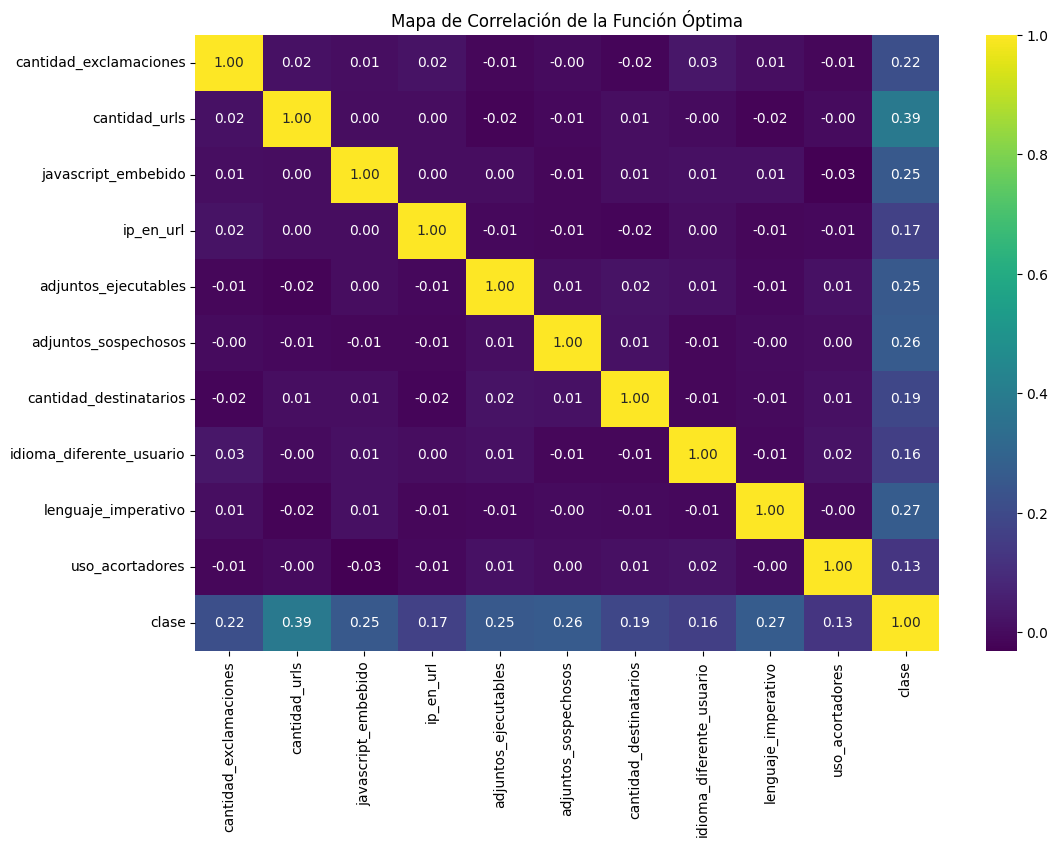

--- RESULTADOS FINALES DEL MODELO ÓPTIMO EN EL CONJUNTO DE PRUEBA ---

Exactitud Final: 0.99733
Puntuación F1 Final: 0.99789

--- Reporte de Clasificación Detallado ---
                precision    recall  f1-score   support

 HAM (Clase 0)       1.00      1.00      1.00       276
SPAM (Clase 1)       1.00      1.00      1.00       474

      accuracy                           1.00       750
     macro avg       1.00      1.00      1.00       750
  weighted avg       1.00      1.00      1.00       750


--- Matriz de Confusión Final ---


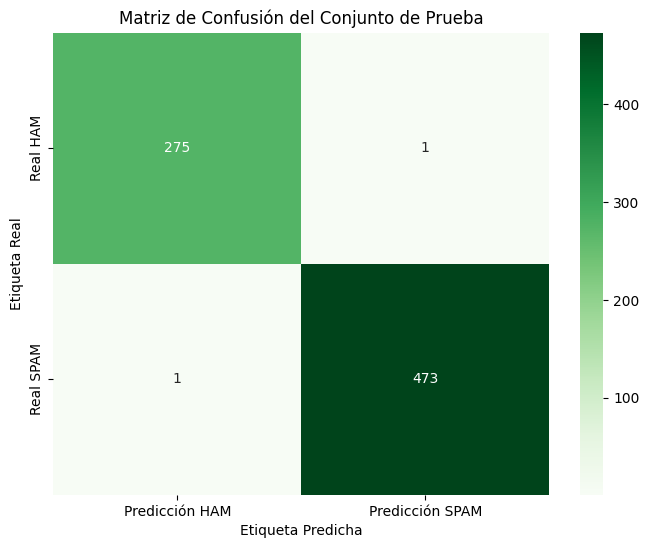

In [38]:
features_del_mejor_modelo = features_3
mejor_modelo = logistic_model_3s

# Sumamos 'clase' para ver su correlación con las demás
features_para_mapa = features_del_mejor_modelo + ['clase']

correlation_matrix_optima = df[features_para_mapa].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_optima, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de Correlación de la Función Óptima')
plt.show()

x_test_final = x_test_scaled[features_del_mejor_modelo]
y_pred_final = mejor_modelo.predict(x_test_final)
print("--- RESULTADOS FINALES DEL MODELO ÓPTIMO EN EL CONJUNTO DE PRUEBA ---")
final_accuracy = accuracy_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)
print(f"\nExactitud Final: {final_accuracy:.5f}")
print(f"Puntuación F1 Final: {final_f1:.5f}")

print("\n--- Reporte de Clasificación Detallado ---")
print(classification_report(y_test, y_pred_final, target_names=['HAM (Clase 0)', 'SPAM (Clase 1)']))

print("\n--- Matriz de Confusión Final ---")
cm_final = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicción HAM', 'Predicción SPAM'],
            yticklabels=['Real HAM', 'Real SPAM'])
plt.title('Matriz de Confusión del Conjunto de Prueba')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

_Cálculo de outliers del modelo_

In [34]:
y_pred_val_optimo = mejor_modelo.predict(x_val[features_del_mejor_modelo])
distancia_optima = mejor_modelo.decision_function(x_val[features_del_mejor_modelo])

# Creamos un DataFrame para analizar los errores
analisis_df_optimo = pd.DataFrame({
    'valor_real': y_val,
    'prediccion': y_pred_val_optimo,
    'distancia_decision': distancia_optima
})

# Filtramos para quedarnos solo con los errores
errores_df_optimo = analisis_df_optimo[analisis_df_optimo['valor_real'] != analisis_df_optimo['prediccion']].copy()
errores_df_optimo['confianza_error'] = np.abs(errores_df_optimo['distancia_decision'])
errores_df_optimo = errores_df_optimo.sort_values(by='confianza_error', ascending=False)

print("\n--- Análisis de Outliers del Modelo Óptimo ---")
print("Los 10 errores en los que el modelo estaba más 'seguro' de su predicción incorrecta:")
print(errores_df_optimo.head(10))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- cantidad_dominios_urls
- cantidad_interrogaciones
- dominio_coincide
Feature names seen at fit time, yet now missing:
- adjuntos_ejecutables
- adjuntos_sospechosos
- cantidad_destinatarios
- cantidad_exclamaciones
- cantidad_urls
- ...
